In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


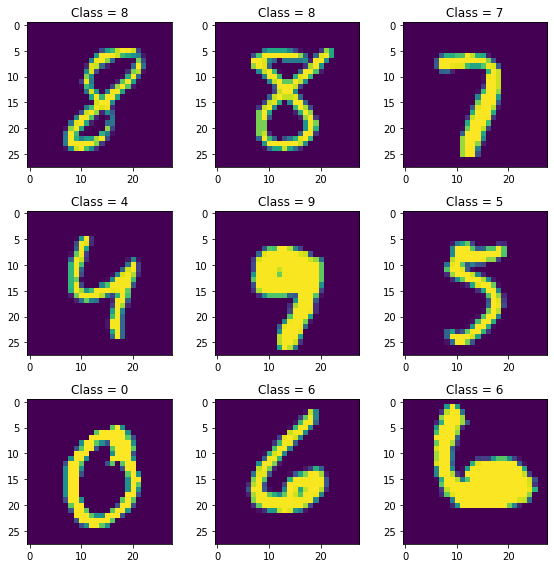

In [20]:
plt.figure(figsize = (8, 8))
for i in range(9):
    img_index = np.random.randint(low = 0, high = len(x_train))
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[img_index])
    plt.title(f"Class = {y_train[img_index]}")
plt.tight_layout()

In [21]:
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units = 784, activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
# model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_data = (x_test, y_test))



Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1871 - accuracy: 0.9420 - val_loss: 0.0902 - val_accuracy: 0.9716
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0798 - accuracy: 0.9755 - val_loss: 0.0763 - val_accuracy: 0.9759
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0512 - accuracy: 0.9834 - val_loss: 0.0704 - val_accuracy: 0.9784
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0396 - accuracy: 0.9867 - val_loss: 0.0699 - val_accuracy: 0.9802
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.0842 - val_accuracy: 0.9781
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.0813 - val_accuracy: 0.9771
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0812 - val_ac

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1]*100)

Test accuracy: 98.0400025844574
